In [126]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
data = pd.read_csv('project_data.csv')
data['Date']=pd.to_datetime(data['Date'])

C:\Users\Katherine\AppData\Local\Temp\ipykernel_120128\1449946650.py:2: UserWarning: Parsing '31/01/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\Katherine\AppData\Local\Temp\ipykernel_120128\1449946650.py:2: UserWarning: Parsing '28/02/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\Katherine\AppData\Local\Temp\ipykernel_120128\1449946650.py:2: UserWarning: Parsing '30/03/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\Katherine\AppData\Local\Temp\ipykernel_120128\1449946650.py:2: UserWarning: Parsing '30/04/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\U

# Q1

In [128]:
data_2007_2010 = data[(data['Date'] >= '2007-01-01') & (data['Date'] <= '2010-12-31')].to_numpy()[:,1:].astype('float64')
data_2016_2019 = data[(data['Date'] >= '2016-01-01') & (data['Date'] <= '2019-12-31')].to_numpy()[:,1:].astype('float64')

In [129]:
log_returns_A = np.log(data_2007_2010+1)
log_returns_B = np.log(data_2016_2019+1)

In [130]:
a_A = (log_returns_A).mean(axis=0)#mu
a_B = (log_returns_B).mean(axis=0)

In [131]:
# B_A = np.cov(log_returns_A,rowvar=False,bias=True)
# B_B = np.cov(log_returns_B,rowvar=False,bias=True)
B_A = np.cov(log_returns_A,rowvar=False)
B_B = np.cov(log_returns_B,rowvar=False)
np.round(B_A,4)

array([[ 0.0026,  0.0026,  0.003 ,  0.0028,  0.0009, -0.0002,  0.    ,
        -0.    ],
       [ 0.0026,  0.0031,  0.0034,  0.0029,  0.001 , -0.0002,  0.    ,
        -0.    ],
       [ 0.003 ,  0.0034,  0.0049,  0.0029,  0.0013, -0.0003,  0.    ,
        -0.    ],
       [ 0.0028,  0.0029,  0.0029,  0.0054,  0.0008, -0.    ,  0.0001,
        -0.    ],
       [ 0.0009,  0.001 ,  0.0013,  0.0008,  0.0005, -0.0001, -0.    ,
        -0.    ],
       [-0.0002, -0.0002, -0.0003, -0.    , -0.0001,  0.0001,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.0001, -0.    ,  0.    ,  0.0001,
        -0.    ],
       [-0.    , -0.    , -0.    , -0.    , -0.    ,  0.    , -0.    ,
         0.    ]])

# Q3

In [132]:
# mu_A_k1 = 12*a_A
# mu_A_k2 = 24*a_A
# mu_B_k1 = 12*a_B
# mu_B_k2 = 24*a_B
# c_A_k1 = 12*B_A
# c_A_k2 = 24*B_A
# c_B_k1 = 12*B_B
# c_B_k2 = 24*B_B

In [133]:
def q3_mu(num_period, mu, cov):
    var = np.diag(num_period*cov)
    return np.exp(num_period*mu+0.5*var)-1


In [134]:
def q3_cov(num_period,mu,cov):
    cov = num_period*cov
    mu = num_period*mu
    result = np.zeros((8,8))
    var = np.diag(cov)
    for i in range(8):
        for j in range(8):
            result[i][j] = np.exp(mu[i]+mu[j]+0.5*(var[i]+var[j]+2*cov[i][j]))-np.exp(mu[i]+0.5*var[i])*np.exp(mu[j]+0.5*var[j])
    return result

In [135]:
mu_A_k1 = q3_mu(12,a_A,B_A)
mu_A_k2 = q3_mu(24,a_A,B_A)
mu_B_k1 = q3_mu(12,a_B,B_B)
mu_B_k2 = q3_mu(24,a_B,B_B)
c_A_k1 = q3_cov(12,a_A,B_A)
c_A_k2 = q3_cov(24,a_A,B_A)
c_B_k1 = q3_cov(12,a_B,B_B)
c_B_k2 = q3_cov(24,a_B,B_B)

In [136]:
def rho(num_period,mu,cov):
    cov = q3_cov(num_period,mu,cov)
    result = np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            result[i][j] = cov[i][j]/(cov[i][i]*cov[j][j])
    return result

In [137]:
rho_A_k1 = rho(12,a_A,B_A)
rho_A_k2 = rho(24,a_A,B_A)
rho_B_k1 = rho(12,a_B,B_B)
rho_B_k2 = rho(24,a_B,B_B)
print(rho_B_k2.round(4))

[[ 3.54026000e+01  1.99680000e+01  1.00516000e+01  1.42397000e+01
   5.44178000e+01 -1.49930000e+00 -1.45822000e+01  3.49700100e+02]
 [ 1.99680000e+01  2.88355000e+01  2.05061000e+01  5.62180000e+00
   8.30320000e+01 -3.56260000e+01 -3.30262000e+01 -1.14834800e+02]
 [ 1.00516000e+01  2.05061000e+01  2.44058000e+01 -2.10100000e-01
   7.26335000e+01 -3.21203000e+01 -9.69830000e+00 -1.24090500e+02]
 [ 1.42397000e+01  5.62180000e+00 -2.10100000e-01  2.43909000e+01
   1.65587000e+01  5.82824000e+01  6.27215000e+01  7.39466900e+02]
 [ 5.44178000e+01  8.30320000e+01  7.26335000e+01  1.65587000e+01
   3.71083900e+02 -5.63388000e+01 -2.63626000e+01 -1.13874240e+03]
 [-1.49930000e+00 -3.56260000e+01 -3.21203000e+01  5.82824000e+01
  -5.63388000e+01  5.42483000e+02  4.34668400e+02  4.00064610e+03]
 [-1.45822000e+01 -3.30262000e+01 -9.69830000e+00  6.27215000e+01
  -2.63626000e+01  4.34668400e+02  5.98346400e+02  2.81620400e+03]
 [ 3.49700100e+02 -1.14834800e+02 -1.24090500e+02  7.39466900e+02
  -

# Q4 and Q5

## Dataset from A

utility maximisation

In [138]:
gamma = 1 #coefficient of absolute risk-aversion
t = 1/gamma
n = 8
mu = np.asarray(mu_A_k2)[0:n]
S = np.asarray(c_A_k2)[0:n,0:n]
r = mu.reshape(n,1)
e = np.ones((n,1))
s_inv = np.linalg.inv(S)
a = float(np.matmul(np.matmul(e.T,s_inv),e)) 
b = float(np.matmul(np.matmul(r.T,s_inv),e)) 
c = float(np.matmul(np.matmul(r.T,s_inv),r)) 
d = a*c-b**2
alpha = (1/a)*np.matmul(s_inv,e)
beta = np.matmul(np.linalg.inv(S),r - (b/a)*e)
##lagrange KKT
lambda_1 = (1-t*float(np.matmul(np.matmul(e.T,s_inv),r)))/float(np.matmul(np.matmul(e.T,s_inv),e)) 
w_utility_A = np.matmul(s_inv,t*r+lambda_1*e)
var_stat_A = float(np.matmul(np.matmul(w_utility_A.T,S),w_utility_A))
mu_stat_A = float(np.matmul(w_utility_A.T,r))
print('weight: \n',w_utility_A)
print("variance: ",var_stat_A)
print("mean: ",mu_stat_A)

weight: 
 [[ 10.99915528]
 [ -7.82542202]
 [  5.14693787]
 [-13.8826628 ]
 [ -0.90055631]
 [ 23.35996485]
 [ 22.58386153]
 [-38.48127842]]
variance:  8.232326104626711
mean:  8.349512590412054


In [139]:
# r0 = 0.109347
# r_bar = r - e*r0
# x0 = 1 - float(t*np.matmul(e.T,np.matmul(np.linalg.inv(S),r_bar))) 
# x = t*(np.matmul(np.linalg.inv(S),r_bar))
# print(x0)
# print(x)
# print(float(sum(x))+x0)

minimum variance of A is bigger than 10%

In [140]:
n = 8
mu = np.asarray(mu_A_k2)[0:n]
S = np.asarray(c_A_k2)[0:n,0:n]
r = mu.reshape(n,1)
e = np.ones((n,1))
s_inv = np.linalg.inv(S)
w_mim_var_A = np.matmul(s_inv,e)/np.matmul(e.T,np.matmul(s_inv,e))
var_mim_var_A= float(np.matmul(np.matmul(w_mim_var_A.T,S),w_mim_var_A))
mu_mim_var_A = float(np.matmul(w_mim_var_A.T,r))
print('weight: \n',w_mim_var_A)
print("variance: ",var_mim_var_A)
print("mean: ",mu_mim_var_A)

weight: 
 [[ 0.00332643]
 [-0.00702621]
 [ 0.0017205 ]
 [ 0.00310074]
 [ 0.02186911]
 [-0.02474471]
 [ 0.05369607]
 [ 0.94805806]]
variance:  3.789739962384948e-05
mean:  0.11722438318494323


plot

In [141]:
### adding a riskfree asset
# r0 = 0.109347
# r_bar = r - e*r0
# x0 = 1 - float(t*np.matmul(e.T,np.matmul(np.linalg.inv(S),r_bar))) 
# x = t*(np.matmul(np.linalg.inv(S),r_bar))
# print(x0)
# print(x)
# print(float(sum(x))+x0)

In [142]:
t_range = np.linspace(0,1.2,1000) 
mus_A =[]
sigs_A = []
for i in t_range:
    mus_A.append((b+d*i)/a) 
    sigs_A.append(np.sqrt((1+d*i**2)/a))
# plt.figure(figsize = (20,10))
# plt.figure(dpi=800)
# plt.plot(sigs_A,mus_A,color="blue",label="Minimum Variance Frontier")
# # plt.plot(effi_sig,effi_mu,color="red",label="Efficient Frontier")
# plt.plot(var_stat_A**0.5,mu_stat_A,"o",label="Optimal Portfolio Portfolio",markersize=5)
# plt.plot(var_mim_var_A**0.5,mu_mim_var_A,"X",label="Minimum Variance Portfolio",markersize=5)
# # plt.plot(risk_B,mu_B,"o",label="Optimal Portfolio",markersize=12)
# plt.ylabel(r'Expected Return ($\mu$)') 
# plt.xlabel(r'Risk ($\sigma$)') 
# plt.legend(loc = 'upper left')

# Dataset from B

In [143]:
gamma = 1
t = 1/gamma
n = 8
mu = np.asarray(mu_B_k2)[0:n]
S = np.asarray(c_B_k2)[0:n,0:n]
r = mu.reshape(n,1)
e = np.ones((n,1))
s_inv = np.linalg.inv(S)
a = float(np.matmul(np.matmul(e.T,s_inv),e)) 
b = float(np.matmul(np.matmul(r.T,s_inv),e)) 
c = float(np.matmul(np.matmul(r.T,s_inv),r)) 
d = a*c-b**2
alpha = (1/a)*np.matmul(s_inv,e)
beta = np.matmul(np.linalg.inv(S),r - (b/a)*e)
##lagrange KKT
lambda_1 = (1-t*float(np.matmul(np.matmul(e.T,s_inv),r)))/float(np.matmul(np.matmul(e.T,s_inv),e)) 
w_utility_B = np.matmul(s_inv,t*r+lambda_1*e)
##
np.matmul(np.matmul(w_utility_B.T,S),w_utility_B)
var_stat_B = np.matmul(np.matmul(w_utility_B.T,S),w_utility_B)
mu_stat_B = np.matmul(w_utility_B.T,r)
print('weight: \n',w_utility_B)
print("variance: ",var_stat_B)
print("mean: ",mu_stat_B)


weight: 
 [[  6.17733393]
 [ 13.45914992]
 [  3.58394893]
 [ -6.09537984]
 [-35.90375754]
 [ 36.26839239]
 [ 36.88278092]
 [-53.3724687 ]]
variance:  [[6.40736751]]
mean:  [[6.44320449]]


In [118]:
# r0 = 0.035919
# r_bar = r - e*r0
# x0 = 1 - float(t*np.matmul(e.T,np.matmul(np.linalg.inv(S),r_bar))) 
# x = 1*(np.matmul(np.linalg.inv(S),r_bar))
# print(x0)
# print(x)
# print(float(sum(x))+x0)

Minimum variance with 10% return

In [119]:
gamma = 1
t = 1/gamma
n = 8
mu = np.asarray(mu_B_k2)[0:n]
S = np.asarray(c_B_k2)[0:n,0:n]
r = mu.reshape(n,1)
e = np.ones((n,1))
s_inv = np.linalg.inv(S)
mu_v = 0.1
m = mu.reshape(8,1)
em = float(np.matmul(e.T,np.matmul(s_inv,m)))
mm = float(np.matmul(m.T,np.matmul(s_inv,m)))
ee = float(np.matmul(e.T,np.matmul(s_inv,e)))
me = float(np.matmul(m.T,np.matmul(s_inv,e)))
w1 = np.linalg.det(np.array([[1,em],[mu_v,mm]]))
w2 = np.linalg.det(np.array([[ee,1],[me,mu_v]]))
w3 = np.linalg.det(np.array([[ee,em],[me,mm]]))
w_min_var_B = (w1*np.matmul(s_inv,e)+w2*np.matmul(s_inv,m))/w3
sig_min_var = np.sqrt(float(np.matmul(w_min_var_B.T,np.matmul(S,w_min_var_B))))
mu_min_var = float(np.matmul(m.T,w_min_var_B))
var_min_var= float(np.matmul(w_min_var_B.T,np.matmul(S,w_min_var_B)))
print(w_min_var_B)
print(var_mim_var)
print(mu_min_var)

[[ 0.06155516]
 [ 0.13492049]
 [ 0.03359197]
 [-0.06272745]
 [-0.34891428]
 [ 0.35223657]
 [ 0.37703938]
 [ 0.45229815]]
0.000644532628785917
0.09999999999999695


plot


<Figure size 1440x720 with 0 Axes>

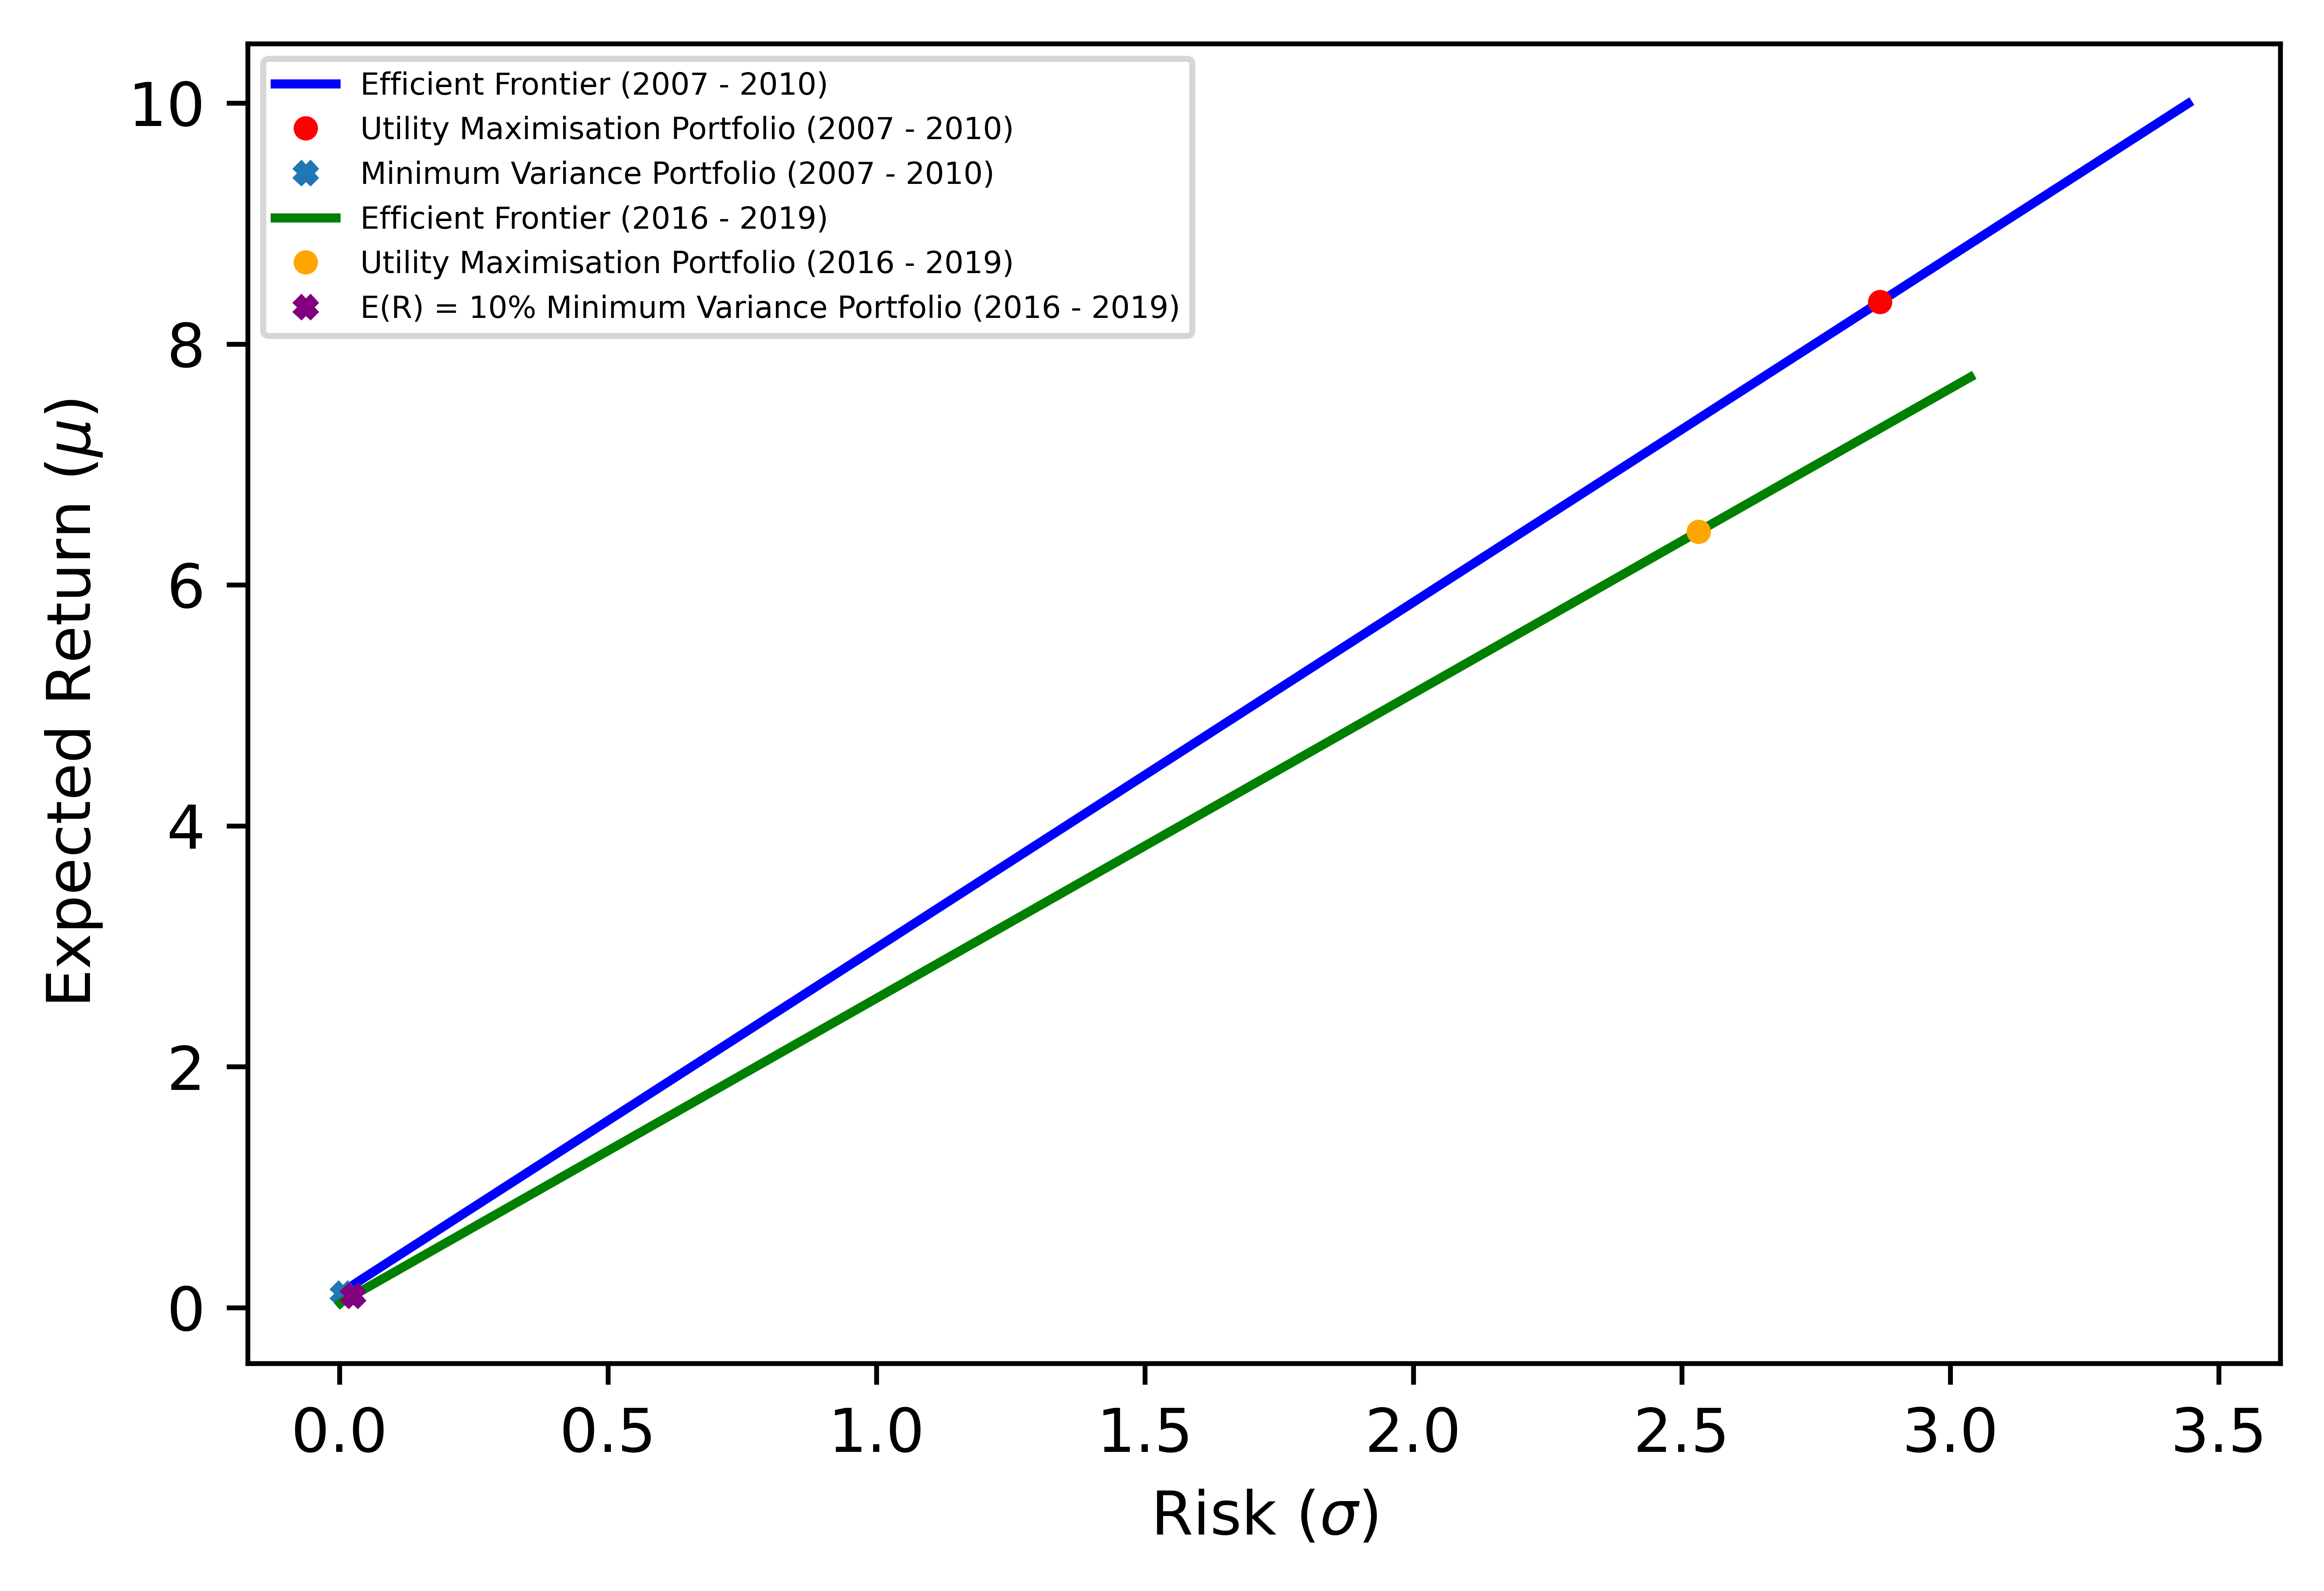

In [62]:
t_range = np.linspace(0,1.2,1000) 
mus_B =[]
sigs_B = []
for i in t_range:
    mus_B.append((b+d*i)/a) 
    sigs_B.append(np.sqrt((1+d*i**2)/a))
mu3 = b/a
sig3 = (1/a)**0.5
risk_A = float(np.sqrt(np.matmul(np.matmul(w_utility_B.T,S),w_utility_B)))
mu_A = float(np.matmul(mu,w_utility_B))


plt.figure(figsize = (20,10))
plt.figure(dpi=1200)
m = 3
plt.plot(sigs_A,mus_A,color="blue",label="Efficient Frontier (2007 - 2010)")
plt.plot(var_stat_A**0.5,mu_stat_A,"o",color="red",label="Utility Maximisation Portfolio (2007 - 2010)",markersize=m)
plt.plot(var_mim_var_A**0.5,mu_mim_var_A,"X",label="Minimum Variance Portfolio (2007 - 2010)",markersize=m)

plt.plot(sigs_B,mus_B,color="green",label="Efficient Frontier (2016 - 2019)")
plt.plot(risk_A,mu_A,"o",color="orange",label="Utility Maximisation Portfolio (2016 - 2019)",markersize=m)
plt.plot(sig_min_var,mu_min_var,"X",color = "purple",label="E(R) = 10% Minimum Variance Portfolio (2016 - 2019)",markersize=m)
# plt.plot(risk_B,mu_B,"o",label="Optimal Portfolio",markersize=12)
plt.ylabel(r'Expected Return ($\mu$)') 
plt.xlabel(r'Risk ($\sigma$)') 
plt.legend(loc = 'upper left',prop = {'size' : 5})

In [63]:
mu_A

6.443204485747847

# Q6

In [144]:
#parameter setting
gamma = 1
mu = np.asarray(mu_B_k1)
S = np.asarray(c_B_k1)
r = mu.reshape(n,1)
e = np.ones((n,1))
s_inv = np.linalg.inv(S)
a = float(np.matmul(np.matmul(e.T,s_inv),e)) 
kesai = float(np.matmul(np.matmul(r.T,s_inv),e/a))
k = 1/(gamma*(1+kesai))
t = k
# calculating
lambda_1 = (1-t*float(np.matmul(np.matmul(e.T,s_inv),r)))/float(np.matmul(np.matmul(e.T,s_inv),e)) 
w_utility_B = np.matmul(s_inv,t*r+lambda_1*e)

print(w_utility_B)


[[  6.9531733 ]
 [ 15.67295797]
 [  4.48065758]
 [ -6.73082972]
 [-40.34056565]
 [ 38.74593285]
 [ 38.28512935]
 [-56.06645568]]


In [145]:
t = 1/gamma*(np.matmul(w_utility_B.T,r)+1)
lambda_2 = (1-t*float(np.matmul(np.matmul(e.T,s_inv),r)))/float(np.matmul(np.matmul(e.T,s_inv),e)) 
u = np.matmul(s_inv,t*r+lambda_2*e)
return_u = np.matmul(u.T,r)
return_u
u

array([[  31.21465406],
       [  70.35693106],
       [  20.12322045],
       [ -30.20875343],
       [-181.13144567],
       [ 173.97444315],
       [ 171.83762023],
       [-255.16666985]])

In [151]:
G_wu=(1+np.matmul(w_utility_B.T,r))*(1+np.matmul(u.T,r))-1
r_yearly=np.sqrt(G_wu+1)-1
var_yearly=(np.matmul(np.matmul(w_utility_B.T,S),w_utility_B)+np.matmul(np.matmul(u.T,S),u))/2
print(var_yearly)
print(r_yearly)


[[35.25998209]]
[[7.46611638]]


# varying coefficient of absolute risk aversion

In [66]:
def utility_max(gamma,mu,cov):
    gamma = gamma
    t = 1/gamma
    n = 8
    mu = np.asarray(mu)[0:n]
    S = np.asarray(cov)[0:n,0:n]
    r = mu.reshape(n,1)
    e = np.ones((n,1))
    s_inv = np.linalg.inv(S)
    a = float(np.matmul(np.matmul(e.T,s_inv),e)) 
    b = float(np.matmul(np.matmul(r.T,s_inv),e)) 
    c = float(np.matmul(np.matmul(r.T,s_inv),r)) 
    d = a*c-b**2
    alpha = (1/a)*np.matmul(s_inv,e)
    beta = np.matmul(np.linalg.inv(S),r - (b/a)*e)
    ##lagrange KKT
    lambda_1 = (1-t*float(np.matmul(np.matmul(e.T,s_inv),r)))/float(np.matmul(np.matmul(e.T,s_inv),e)) 
    return np.matmul(s_inv,t*r+lambda_1*e)

def mu_sig(x,cov,mu):
    mu = float(np.matmul(x.T,mu))
    sig = np.sqrt(float(np.matmul(np.matmul(x.T,cov),x)))
    return mu,sig

In [67]:
gamma1 = utility_max(1,mu_A_k1,c_A_k1)
gamma1

array([[ 10.29568909],
       [ -8.27221219],
       [  6.24363164],
       [-10.73286769],
       [ -1.3792622 ],
       [ 23.77724042],
       [ 23.87633407],
       [-42.80855314]])

6.407367513974735

<Figure size 1440x144 with 0 Axes>

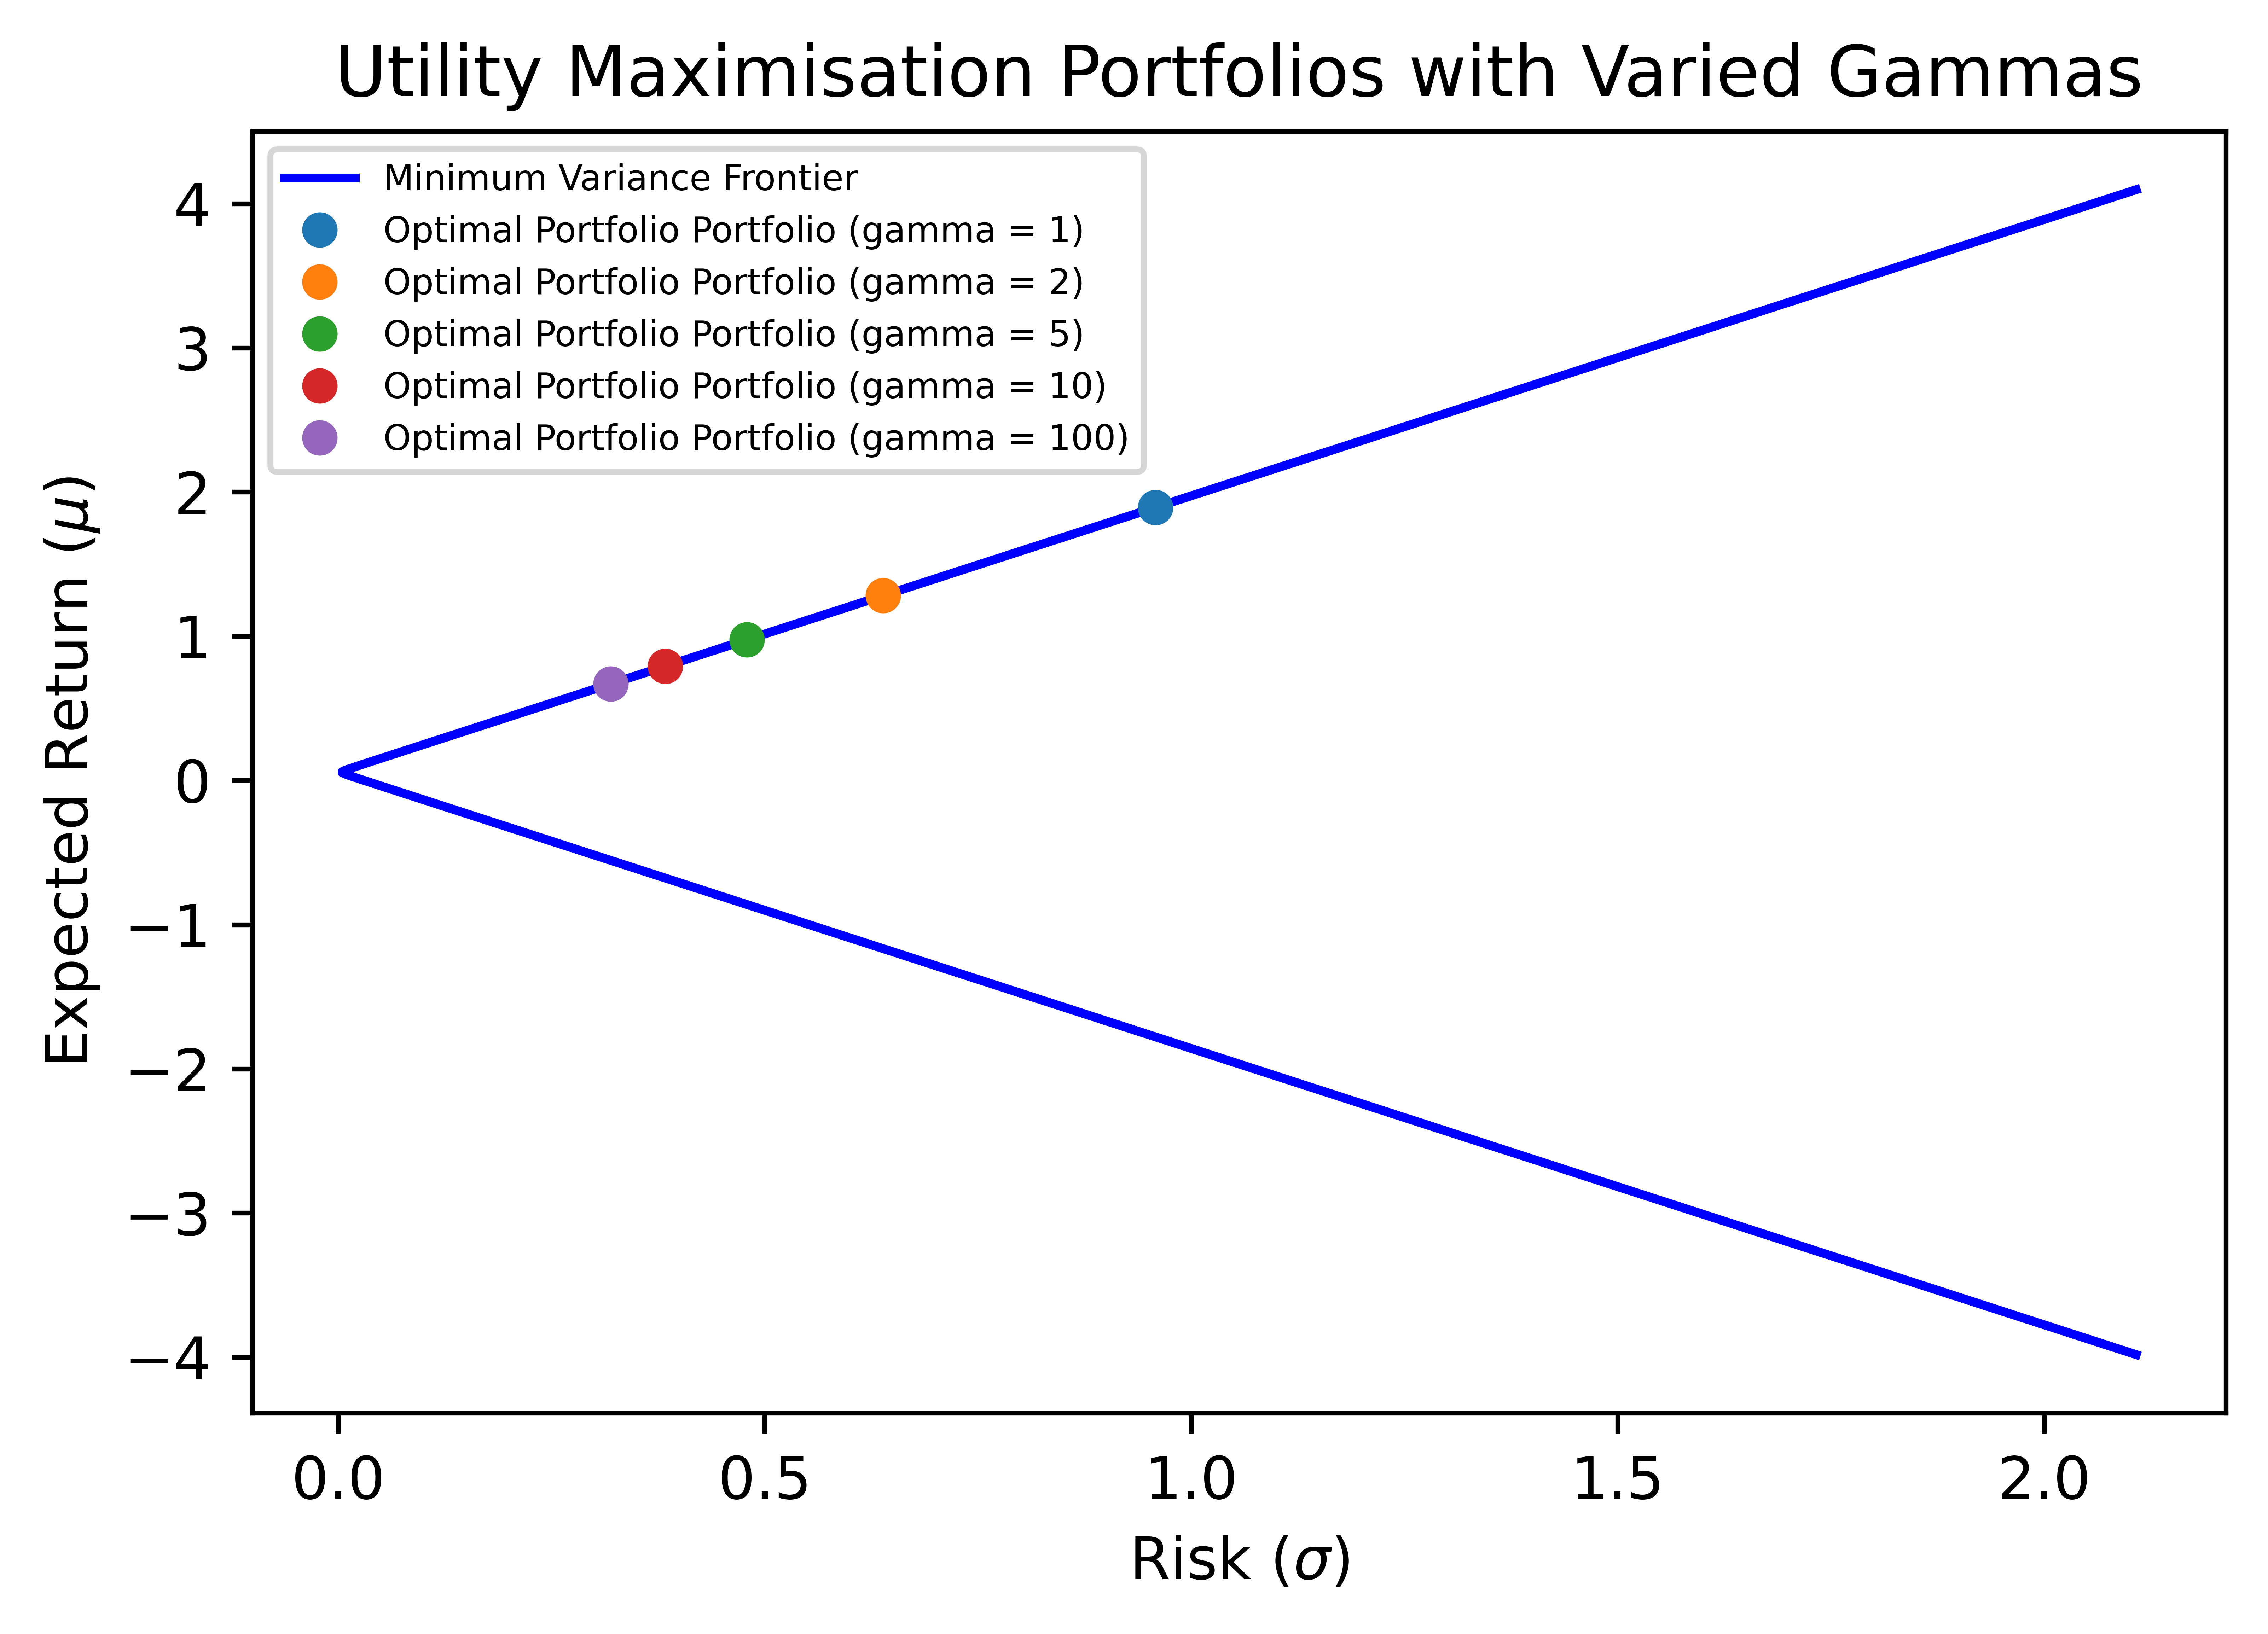

In [68]:
gamma1 = utility_max(2,mu_A_k1,c_A_k1)
gamma2 = utility_max(3,mu_A_k1,c_A_k1)
gamma5 = utility_max(4,mu_A_k1,c_A_k1)
gamma10 = utility_max(5,mu_A_k1,c_A_k1)
gamma100 = utility_max(6,mu_A_k1,c_A_k1)
t_range = np.linspace(-1.1,1.1,1000) 
mu2 =[]
sig2 = []
mu = np.asarray(mu_A_k1)
S = np.asarray(c_A_k1)
r = mu.reshape(8,1)
e = np.ones((8,1))
s_inv = np.linalg.inv(S)
a = float(np.matmul(np.matmul(e.T,s_inv),e)) 
b = float(np.matmul(np.matmul(r.T,s_inv),e)) 
c = float(np.matmul(np.matmul(r.T,s_inv),r)) 
d = a*c-b**2
for i in t_range:
    mu2.append((b+d*i)/a) 
    sig2.append(np.sqrt((1+d*i**2)/a))
mu3 = b/a
sig3 = (1/a)**0.5
plt.figure(figsize = (20,2))
plt.figure(dpi=1200)
plt.plot(sig2,mu2,color="blue",label="Minimum Variance Frontier")
plt.plot(mu_sig(gamma1,S,mu)[1],mu_sig(gamma1,S,mu)[0],"o",label="Optimal Portfolio Portfolio (gamma = 1)",markersize=5)
plt.plot(mu_sig(gamma2,S,mu)[1],mu_sig(gamma2,S,mu)[0],"o",label="Optimal Portfolio Portfolio (gamma = 2)",markersize=5)
plt.plot(mu_sig(gamma5,S,mu)[1],mu_sig(gamma5,S,mu)[0],"o",label="Optimal Portfolio Portfolio (gamma = 5)",markersize=5)
plt.plot(mu_sig(gamma10,S,mu)[1],mu_sig(gamma10,S,mu)[0],"o",label="Optimal Portfolio Portfolio (gamma = 10)",markersize=5)
plt.plot(mu_sig(gamma100,S,mu)[1],mu_sig(gamma100,S,mu)[0],"o",label="Optimal Portfolio Portfolio (gamma = 100)",markersize=5)
plt.ylabel(r'Expected Return ($\mu$)') 
plt.xlabel(r'Risk ($\sigma$)') 
plt.title("Utility Maximisation Portfolios with Varied Gammas")
plt.legend(loc = 'upper left',prop={'size': 6})
risk_A**2


In [69]:
gamma1

array([[  5.14956289],
       [ -4.13959911],
       [  3.12288325],
       [ -5.36525515],
       [ -0.67886539],
       [ 11.87658938],
       [ 11.96565165],
       [-20.93096751]])

In [70]:
gamma2

array([[  3.43418749],
       [ -2.76206142],
       [  2.08263378],
       [ -3.57605096],
       [ -0.44539979],
       [  7.90970569],
       [  7.99542418],
       [-13.63843897]])

In [71]:
gamma5

array([[ 2.57649979],
       [-2.07329258],
       [ 1.56250905],
       [-2.68144887],
       [-0.32866699],
       [ 5.92626385],
       [ 6.01031044],
       [-9.9921747 ]])

In [72]:
gamma10

array([[ 2.06188717],
       [-1.66003127],
       [ 1.25043421],
       [-2.14468762],
       [-0.25862731],
       [ 4.73619875],
       [ 4.8192422 ],
       [-7.80441614]])

In [73]:
gamma100

array([[ 1.71881209],
       [-1.38452373],
       [ 1.04238432],
       [-1.78684678],
       [-0.21193419],
       [ 3.94282201],
       [ 4.0251967 ],
       [-6.34591043]])

# Model Compare

return

In [74]:
returns_2020_2021 = np.asarray((data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2021-12-31')]))[:,1:]

In [120]:
real_monthly_returns_B = np.zeros(24)
for i in range(len(real_monthly_returns_B)):
    real_monthly_returns_B[i] = np.matmul(returns_2020_2021[i],w_min_var_B)
real_monthly_returns_B
print(np.var(real_monthly_returns_B))
print(np.mean(real_monthly_returns_B))

7.41960530151908e-05
0.0013760665849001953
